DESCRIPTION: Trying out various histogram equalization techniques
INPUT: image
OUTPUT: normalized image

In [38]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.utils.image_utils import *
from src.utils.visualization_utils import concat_n_images

In [39]:
IMAGE_FILENAME = r"C:\Users\cernil\Documents\test_floor_classification_output\test_images_elevator_control_panel\frame_005016.jpg"
img_raw = cv2.imread(IMAGE_FILENAME)
img = crop_to_area_above_threshold(img_raw, threshold=0)

In [40]:
def create_image_histogram(img):
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.figure(dpi=250)
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    canvas = plt.gca().figure.canvas
    canvas.draw()
    data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
    image = data.reshape(canvas.get_width_height()[::-1] + (3,))
    plt.close()
    return image

def enhance_edges(img, kernel_intensity=17):
    blur = cv2.bilateralFilter(img, 5, 75, 75)
    ki = kernel_intensity
    kernel_sharp = np.array((
         [-2, -2, -2],
         [-2, ki, -2],
         [-2, -2, -2]), dtype='int')
    im = cv2.filter2D(blur, -1, kernel_sharp)
    return im

def equalize(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

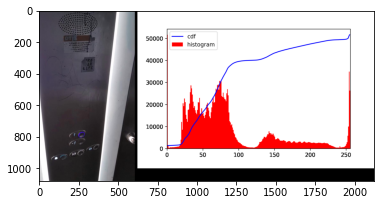

In [41]:
histogram = create_image_histogram(img)
orig_merged = concat_n_images([img, histogram])
plt.imshow(orig_merged)
plt.savefig(r'test_he\1_original.png', dpi=500)

NOW WE TRY TO EQUALIZE THIS HISTOGRAM USING
CV2 EQUALIZE HISTOGRAM

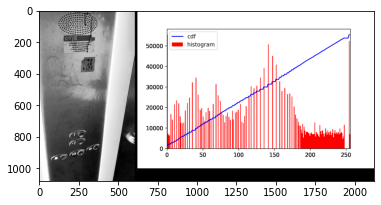

In [42]:
eq = grayscale_to_colour(cv2.equalizeHist(grayscale(img.copy())))
eq_histogram = create_image_histogram(eq)
eq_merged = concat_n_images([eq, eq_histogram])
plt.imshow(eq_merged)
plt.savefig(r'test_he\2_equalized_gray.png', dpi=500)

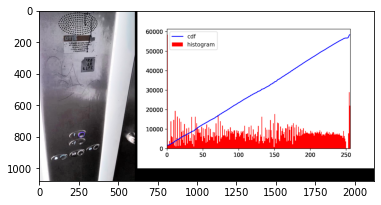

In [43]:
equalized = equalize(img)
equalized_histogram = create_image_histogram(equalized)
equalized_merged = concat_n_images([equalized, equalized_histogram])
plt.imshow(equalized_merged)
plt.savefig(r'test_he\3_equalized.png', dpi=500)

In [44]:
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe3 = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe4 = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
gray = grayscale(img.copy())
cl2 = grayscale_to_colour(clahe2.apply(gray.copy()))
cl3 = grayscale_to_colour(clahe3.apply(gray.copy()))
cl4 = grayscale_to_colour(clahe4.apply(gray.copy()))
cl2_histogram = create_image_histogram(cl2)
cl3_histogram = create_image_histogram(cl3)
cl4_histogram = create_image_histogram(cl4)

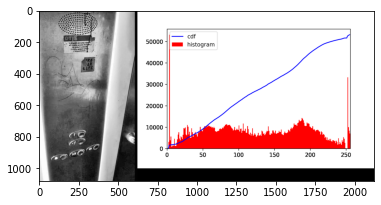

In [45]:
cl2_merged = concat_n_images([cl2, cl2_histogram])
plt.imshow(cl2_merged)
plt.savefig(r'test_he\4_clahe2.png', dpi=500)

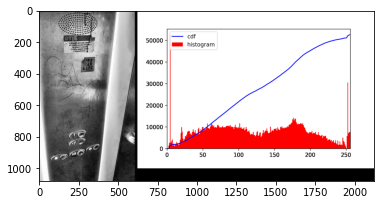

In [46]:
cl3_merged = concat_n_images([cl3, cl3_histogram])
plt.imshow(cl3_merged)
plt.savefig(r'test_he\5_clahe3.png', dpi=500)

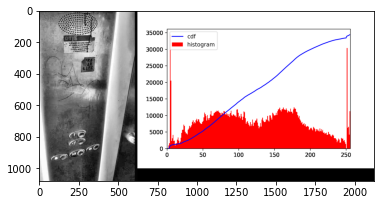

In [47]:
cl4_merged = concat_n_images([cl4, cl4_histogram])
plt.imshow(cl4_merged)
plt.savefig(r'test_he\6_clahe4.png', dpi=500)

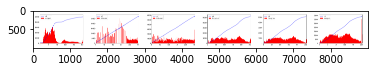

In [48]:
merged_img = concat_n_images([img,eq,equalized, cl2, cl3, cl4])
merged_histogram = concat_n_images([histogram, eq_histogram, equalized_histogram, cl2_histogram, cl3_histogram, cl4_histogram])
plt.imshow(merged_img)
plt.savefig(r'test_he\7_equalization_all.png', dpi=1000)
plt.imshow(merged_histogram)
plt.savefig(r'test_he\8_histogram_all.png', dpi=1000)



